## Supervised learning demo - Regression

In [2]:
#import libraries
import numpy as np #ตัวเลข
import pandas as pd #การนำเข้าตาราง
import seaborn as sns #พลอตกราฟ

import statsmodels.api as sm #ทำสมการ regression

import matplotlib #พลอดกราฟ
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Regression

### 1.1 Example Case

In [3]:
#our example data
x = [2, 3, 4, 10 ,11, 12, 15, 18, 20, 25] 
y = [5, 6, 7, 8, 7, 9, 10, 11 ,12 ,14]

สำรวจข้อมูลด้วย scatter plot

<AxesSubplot:>

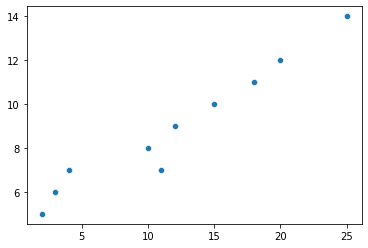

In [4]:
#plot a scatterplot
sns.scatterplot(x=x, y=y)

ทดสอบการสร้างโมเดล Baseline prediction - ค่าเฉลี่ยของค่า y

In [5]:
y

[5, 6, 7, 8, 7, 9, 10, 11, 12, 14]

In [8]:
[np.mean(y)]*10

[8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9]

In [4]:
# baseline prediction: mean of y 
y_baseline = [np.mean(y)]*10

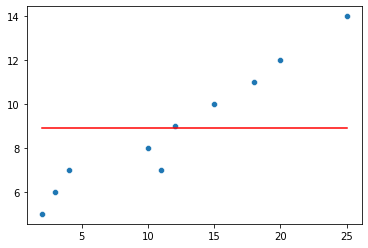

In [5]:
# plot baseline prediction
sns.scatterplot(x=x, y=y)
plt.plot(x, y_baseline, color='r')
plt.show()

ทดสอบการสร้างโมเดล OLS Method

In [9]:
x

[2, 3, 4, 10, 11, 12, 15, 18, 20, 25]

In [10]:
x_const = sm.add_constant(x)

In [11]:
x_const

array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 15.],
       [ 1., 18.],
       [ 1., 20.],
       [ 1., 25.]])

In [12]:
# fit the line with regression model
x_const = sm.add_constant(x) # add intercept
model = sm.OLS(y,x_const) # initialize model
results = model.fit() #fit model

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.08e-06
Time:                        10:39:35   Log-Likelihood:                -9.3609
No. Observations:                  10   AIC:                             22.72
Df Residuals:                       8   BIC:                             23.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5591      0.421     10.825      0.0

C:\Users\natanop\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


แสดงผลค่า predictions

In [7]:
#predictions
y_pred =  results.predict(x_const)
y_pred

array([ 5.28257576,  5.64431818,  6.00606061,  8.17651515,  8.53825758,
        8.9       ,  9.98522727, 11.07045455, 11.79393939, 13.60265152])

In [16]:
x

[2, 3, 4, 10, 11, 12, 15, 18, 20, 25]

In [13]:
4.56 + (0.36 *2)

5.279999999999999

In [14]:
4.56 + (0.36 *3)

5.64

In [15]:
4.56 + (0.36 *25)

13.559999999999999

แสดงผลค่า r-squared

In [8]:
results.rsquared

0.9477750758614957

เก็บข้อมูลสรุปเป็นตาราง

In [9]:
#summarize x, y, and y predictions in to a data table
data = pd.DataFrame({ 
                      'x' :x,
                      'y_true':y,
                      'y_pred':y_pred 
                    })

In [10]:
#show data
data

,x,y_true,y_pred
0,2,5,5.282576
1,3,6,5.644318
2,4,7,6.006061
3,10,8,8.176515
4,11,7,8.538258
5,12,9,8.900000
6,15,10,9.985227
7,18,11,11.070455
8,20,12,11.793939
9,25,14,13.602652


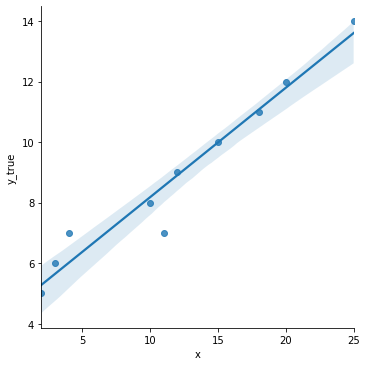

In [11]:
#plot the best fit line
sns.lmplot(x='x', y='y_true', data=data, markers=['o'])

<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

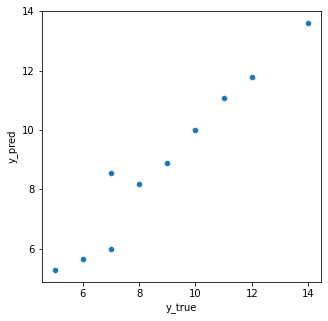

In [12]:
#plot y_true vs, y_pred
plt.figure(figsize=(5,5))
sns.scatterplot(x='y_true', y='y_pred', data=data)

In [13]:
from sklearn.metrics import mean_squared_error
y_true = data['y_true']
y_pred = data['y_pred']

print('MSE: ', mean_squared_error(y_true, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))

MSE:  0.3807196969696969
RMSE:  0.6170248754869587


### 1.2 Linear regression with real data - advertising dataset

อ่านข้อมูลก่อน

In [14]:
ads = pd.read_csv('data/advertising.csv')
ads.head() #แสดง 5 แถวแรก

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
ads.shape #แสดงจำนวนแถวและคอลัมน์

(200, 4)

ทดสอบหาความสัมพันธ์ระหว่าง ยอดขายกับการโฆษณาทางวิทยุ

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

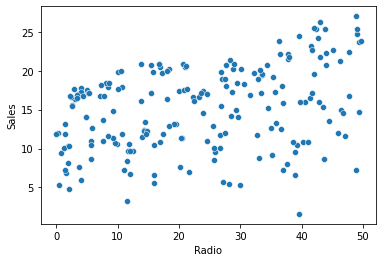

In [16]:
#plot a scatterplot
sns.scatterplot(x='Radio', y='Sales', data=ads)

คำนวนค่า Baseline

In [17]:
sales_base = [np.mean(ads['Sales'])]*200
sales_base[0]

15.130500000000005

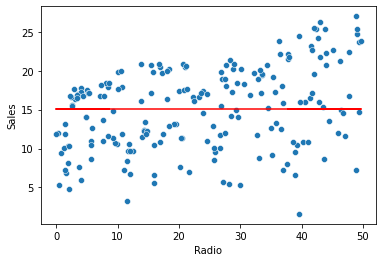

In [18]:
#visualizing baseline
sns.scatterplot(x='Radio', y='Sales', data=ads)
plt.plot(ads['Radio'], sales_base, color='r')
plt.show()

สร้างโมเดลด้วย OLS method

In [19]:
x = ads['Radio']
y = ads['Sales']

In [20]:
# fit the line with regression model
x_const = sm.add_constant(x) # add intercept
model = sm.OLS(y,x_const) # initialize model
results = model.fit() #fit model

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           3.88e-07
Time:                        23:36:51   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.0

In [21]:
#predictions
y_pred =  results.predict(x_const)
ads['y_pred'] = y_pred

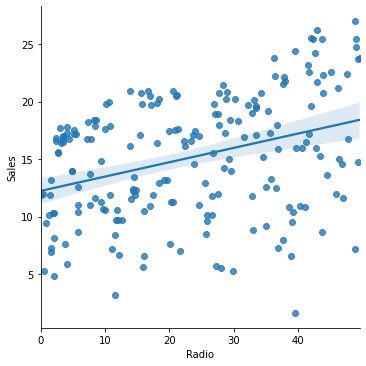

In [22]:
#plot the best fit line
sns.lmplot(x='Radio', y='Sales', data=ads, markers=['o'])

In [23]:
from sklearn.metrics import mean_squared_error
y_true = ads['Sales']
y_pred = ads['y_pred']

print('MSE: ', mean_squared_error(y_true, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))

MSE:  24.384049466937633
RMSE:  4.9380208046278655


### 1.3 ให้นักศึกษาลองทำโมเดลจากข้อมูลชุดเดิม
- Y เป็นยอดขาย
- X เป็นการโฆษณาในหนังสือพิมพ์ 

โดยจะต้องแสดง <br>
- scatter plot ระหว่างสองตัวแปร
- ผลการ fit model ด้วย statsmodels
- ค่า r-squared และ MSE&RMSE

In [24]:
#แสดง Scatterplot



In [25]:
# Fit model ด้วย statsmodels



In [26]:
# ค่า R-squared



In [27]:
# ค่า MSE&RMSE



### 1.4 Multiple linear regression
- Y เป็นยอดขาย
- X เป็นการโฆษณาในทุกช่องทาง

In [28]:
x = ads[['Radio', 'Newspaper', 'TV']]
y = ads['Sales']

In [29]:
# fit the line with regression model
x_const = sm.add_constant(x) # add intercept
model = sm.OLS(y,x_const) # initialize model
results = model.fit() #fit model

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           8.13e-99
Time:                        23:36:51   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

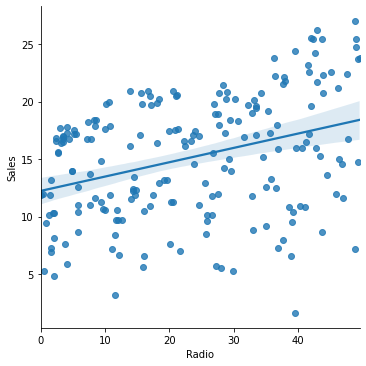

In [30]:
#plot the best fit line
sns.lmplot(x='Radio', y='Sales', data=ads, markers=['o'])

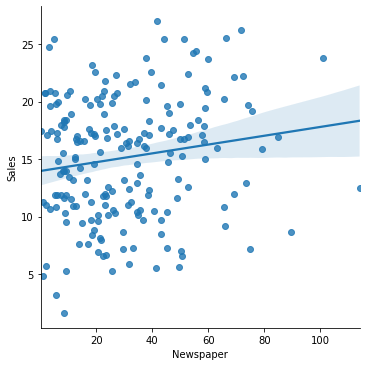

In [31]:
#plot the best fit line
sns.lmplot(x='Newspaper', y='Sales', data=ads, markers=['o'])

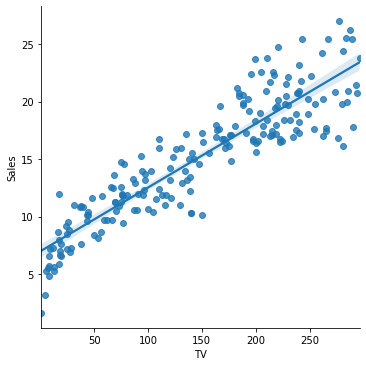

In [32]:
#plot the best fit line
sns.lmplot(x='TV', y='Sales', data=ads, markers=['o'])

In [33]:
#predictions and evaluation
y_pred =  results.predict(x_const)
ads['y_pred'] = y_pred

y_true = ads['Sales']
y_pred = ads['y_pred']

print('MSE: ', mean_squared_error(y_true, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))

MSE:  2.706006147627315
RMSE:  1.6449942697855562


Check for correlation

<AxesSubplot:>

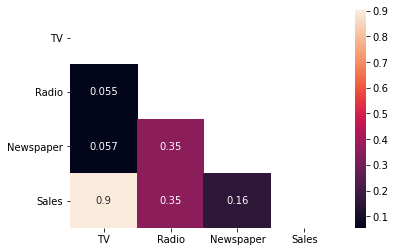

In [34]:
cor_ads = ads[['TV','Radio','Newspaper','Sales']].corr()

mask = np.zeros_like(cor_ads.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(cor_ads, annot=True, mask=mask)